<a href="https://colab.research.google.com/github/Boshjiggs1/IST-652-Scripting-for-Data-Analysis/blob/main/Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages that might be useful for this project.
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [ ]:
# Import data
stores = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/store-sales-time-series-forecasting/stores.csv')
transactions = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/store-sales-time-series-forecasting/transactions.csv')
holidays_events = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/store-sales-time-series-forecasting/holidays_events.csv')
oil = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/store-sales-time-series-forecasting/oil.csv')
train = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/store-sales-time-series-forecasting/test.csv')

In [ ]:
counts = stores.nunique()
counts

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [ ]:
counts = transactions.nunique()
counts

date            1682
store_nbr         54
transactions    4993
dtype: int64

In [ ]:
counts = oil.nunique()
counts

date          1218
dcoilwtico     998
dtype: int64

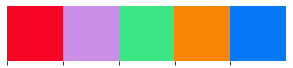

In [ ]:
# Choose color palette for Project
my_color_palette = ["#f70525","#ca8ee8","#3ce685","#f78605","#057af7"]
sns.palplot(sns.color_palette(my_color_palette))

# Set Style
#sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

In [ ]:
# build KPI grid
fig = go.Figure(data=[go.Table(header=dict(values=['KPI', 'Value']),
                 cells=dict(values=[['Number of Stores', 'Number of Different Products', 
                                     'Window Start Date', 'Window End Date',
                                    'Number of Rows in training set', ' Number of Date Points in Train Dataset'], 
                                    [train['store_nbr'].nunique(), train['family'].nunique(), 
                                     train['date'].min(), train['date'].max(),
                                    train.shape[0], train['date'].nunique()]]))
                     ])

fig.update_layout({"title": f'BASIC KPIs of TRAIN DATASET'}, height=550, width=550)
fig.show()

In [ ]:
# Ranking of items sold as each store.
familyproducts = train[['family', 'sales']].groupby('family').mean().sort_values('sales', ascending=True)
familyproducts = familyproducts.reset_index()
familyproducts['sales'] = familyproducts['sales']

In [ ]:
# Plot family products average sales
fig = px.bar(familyproducts, x='sales', y='family', color='sales', color_continuous_scale="sunsetdark")
fig.update_layout({"title": f'Average sales for each family products',
                   "xaxis": {"title": "Average units sold"},
                   "yaxis": {"title": "Product Category"},
                   "showlegend": True},
                  width=1000,
                  height=800)

fig.show()

In [ ]:
# Rank number of products sold by a store, using all products.
storesales = train[['store_nbr', 'sales']].groupby('store_nbr').mean().sort_values('sales', ascending=False)
storesales = storesales.reset_index()
#storesales['store_nbr'] = 'store_' + storesales['store_nbr'].astype(str)
storesales['sales'] = storesales['sales'] 
storesales = pd.merge(storesales, stores, how='left')
storesales['store_nbr'] = storesales['store_nbr'].astype(str)

In [ ]:
# plot the average sales of each store in a descending order.
fig = px.bar(storesales, x='store_nbr', y='sales', color='type', category_orders={"store_nbr": list(storesales['store_nbr']),
                             "sales": list(df_store['sales'])
                              })
fig.update_layout({"title": f'Average Sales of Each Store',
                   "xaxis": {"title":"Store #"},
                   "yaxis": {"title":"Average Units Sold"},
                   "showlegend": True})


fig.show()

NameError: ignored

In [ ]:
holidays_events = holidays_events[(holidays_events['date'] >= "2013-01-01") & (holidays_events['date'] <= "2017-08-15")]

In [ ]:
# plot the average sales during holidays.
train_aux = train[['date', 'sales']].groupby('date').mean()
train_aux = train_aux.reset_index()
fig = go.Figure(data=go.Scatter(x=train_aux['date'], 
                                y=train_aux['sales'],
                                marker_color='black', text="sales"))
for holiday_date in list(holidays_events['date']):
    fig.add_vline(x=holiday_date, line_width=0.5, line_dash="dot", line_color="cornflowerblue")
#fig.add_vline(x="2013-08-08", line_width=0.5, line_dash="dash", line_color="green", annotation="test")


fig.update_layout({"title": f'Average Sales on Holidays',
                   "xaxis": {"title":"Date"},
                   "yaxis": {"title":"Average Units Sold"},
                   "showlegend": False})
fig.show()

In [ ]:
# merge holidays and train data on date.
plot = pd.merge(holidays_events, train_aux, on='date', how='inner')
plot.loc[plot['description'].isin(['Black Friday', 'Cyber Monday']), 'type'] = 'black_friday_cyber_monday'

In [ ]:
# plot the above merged file.
fig = px.scatter(plot, x="date", y="sales", size='sales', color='type')
                 

fig.update_layout({"title": f'Avg Sales During Holiday Events',
                   "xaxis": {"title":"Holiday Event/Year"},
                   "yaxis": {"title":"Average Sales"},
                   "showlegend": True})

fig.add_annotation(x='2014-07-05',y=500,xref="x",yref="y",text="World Cup",showarrow=True, align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#000000",ax=0,ay=-30,bordercolor="#000000",borderwidth=2,borderpad=4,bgcolor="#ca8ee8",opacity=0.8  )

fig.add_annotation(x='2016-04-20',y=800,xref="x",yref="y",text="Earthquake!!!",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#000000",ax=0,ay=-30,bordercolor="#000000",borderwidth=2,borderpad=4,bgcolor="#ca8ee8",opacity=0.8)

fig.add_annotation(x='2013-12-30',y=200,xref="x",yref="y",text="Christmas 2013",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#000000",ax=0,ay=30,bordercolor="#000000",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2014-12-30',y=200,xref="x",yref="y",text="Christmas 2014",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#000000",ax=0,ay=30,bordercolor="#000000",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2015-12-30',y=200,xref="x",yref="y",text="Christmas 2015",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#000000",ax=0,ay=30,bordercolor="#000000",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2016-12-30',y=200,xref="x",yref="y",text="Christmas 2016",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#000000",ax=0,ay=30,bordercolor="#000000",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)



fig.show()

Text(0.5, 0, 'Count')

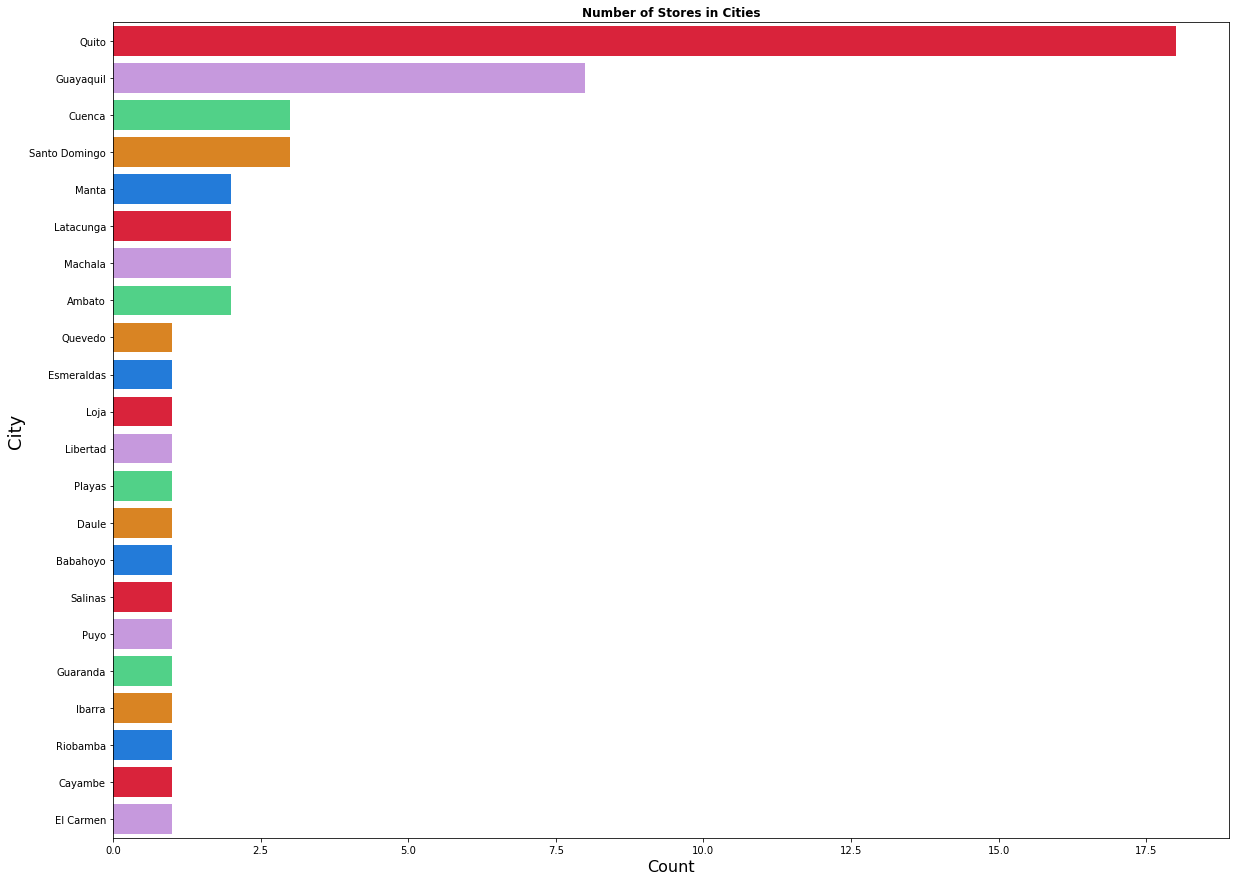

In [ ]:
# plot how many stores are in each city
plt.figure(figsize=(20, 15))

sns.countplot(data=stores, y='city',
              order=stores.city.value_counts().index,
              palette=my_color_palette,
              )
plt.title('Number of Stores in Cities', fontweight="bold")
plt.ylabel('City', fontsize=18)
plt.xlabel('Count', fontsize=16)

Text(0.5, 0, 'Count')

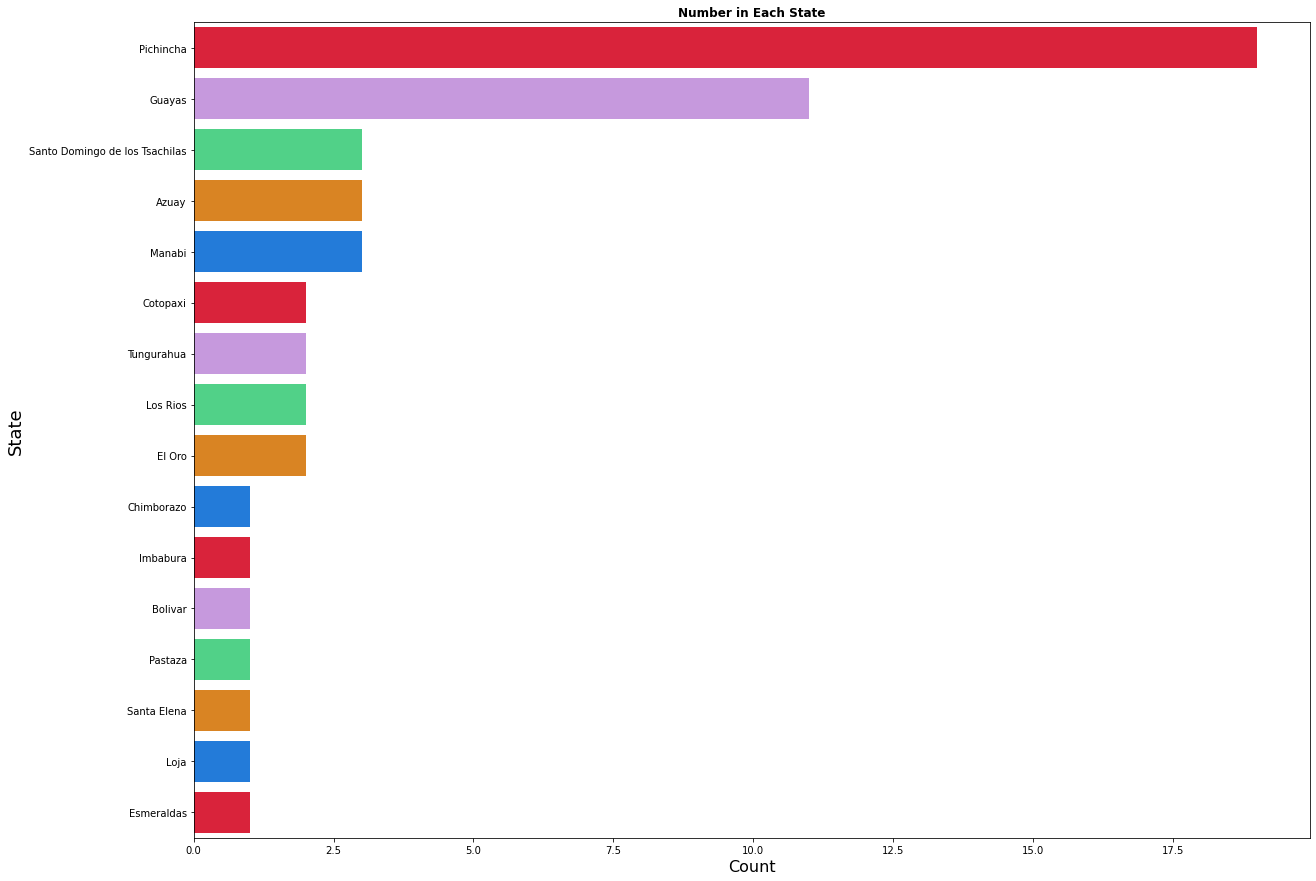

In [ ]:
# plot how many stores are in each state.
plt.figure(figsize=(20, 15))

sns.countplot(data=stores, y='state', 
              order=stores.state.value_counts().index,
              palette=my_color_palette,
              )
plt.title('Number in Each State',fontweight="bold")
plt.ylabel('State', fontsize=18)
plt.xlabel('Count', fontsize=16)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 9 Text major ticklabel objects>)

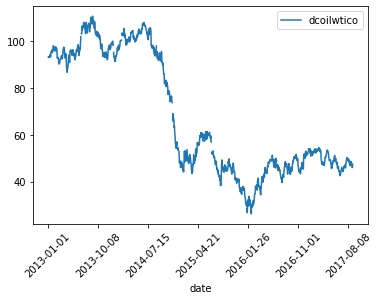

In [ ]:
# Basic plot of the oil data folowing the date.
oil1 = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/store-sales-time-series-forecasting/oil.csv', index_col='date')
oil1.plot()
plt.xticks(rotation=45)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 9 Text major ticklabel objects>)

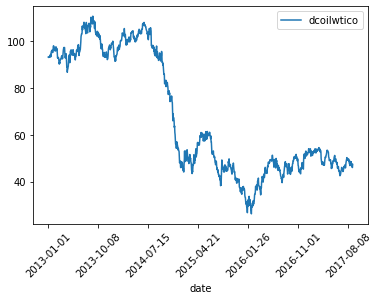

In [ ]:
# this fills in the data that is missing
oil2 = oil1.interpolate(method='linear')
# It seems as though the first row is still missing data.
oil2.iloc[0] = oil2.iloc[1]
oil2.plot()
plt.xticks(rotation=45)

In [ ]:
# imports prophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [ ]:
train=train.reset_index()
# sales for the store number 1
sales = train[train.store_nbr == 44].loc[:, ['date', 'sales']]

sales = sales.sort_index(ascending = False)

# to datetime64
sales['date'] = pd.DatetimeIndex(sales['date'])
sales.dtypes

# all variables need specific names
sales = sales.rename(columns = {'date': 'ds',
                                'sales': 'y'})
sales.head()

NameError: ignored

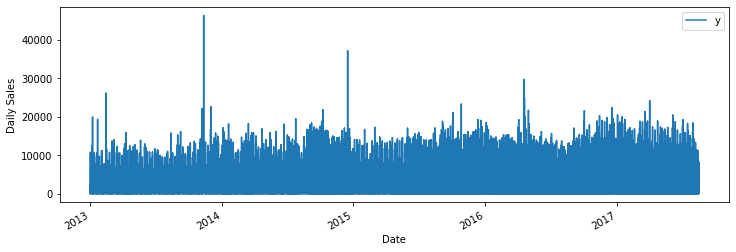

In [ ]:
ax = sales.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Sales')
ax.set_xlabel('Date')
plt.show()

In [ ]:
holidays_events.groupby(['type','locale']).head(100)
print(holidays_events.type.unique())
print(holidays_events.locale.unique())

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
['Local' 'Regional' 'National']


In [ ]:
state_dates = holidays_events[((holidays_events.locale == 'National') |
                             (holidays_events.locale == 'Regional') &
                             (holidays_events.type == 'Holiday'))].loc[:, 'date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
holidays = state      
holidays.head()

,holiday,ds
0,state_holiday,2012-04-01
1,state_holiday,2012-06-25
2,state_holiday,2012-08-10
3,state_holiday,2012-10-09
4,state_holiday,2012-10-12


In [ ]:
# set the uncertainty interval to 90% (the Prophet default is 80%)
themodel = Prophet(interval_width = 0.90, 
                   holidays = holidays)
themodel.fit(sales)

# extends 52 weeks into future 
future_dates = themodel.make_future_dataframe(periods = 52*7)

print("First week to forecast.")
future_dates.tail(7)

NameError: ignored

In [ ]:
# predict
forecast = themodel.predict(future_dates)

# preditions for the last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2041,2018-08-08,1353.805363,-2926.387738,5966.797549
2042,2018-08-09,1076.258071,-3560.694832,5632.204948
2043,2018-08-10,1278.912314,-3019.728231,5721.180314
2044,2018-08-11,1699.253671,-3056.519806,6478.460520
2045,2018-08-12,1782.761527,-2888.639118,6199.856597
2046,2018-08-13,1262.264827,-3373.476726,5533.696193
2047,2018-08-14,1177.189896,-3243.115653,5496.419780


In [ ]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

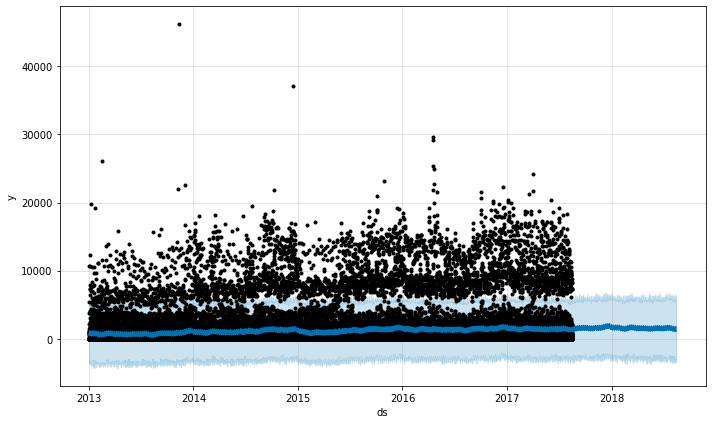

In [ ]:
# plot predicions
themodel.plot(forecast);

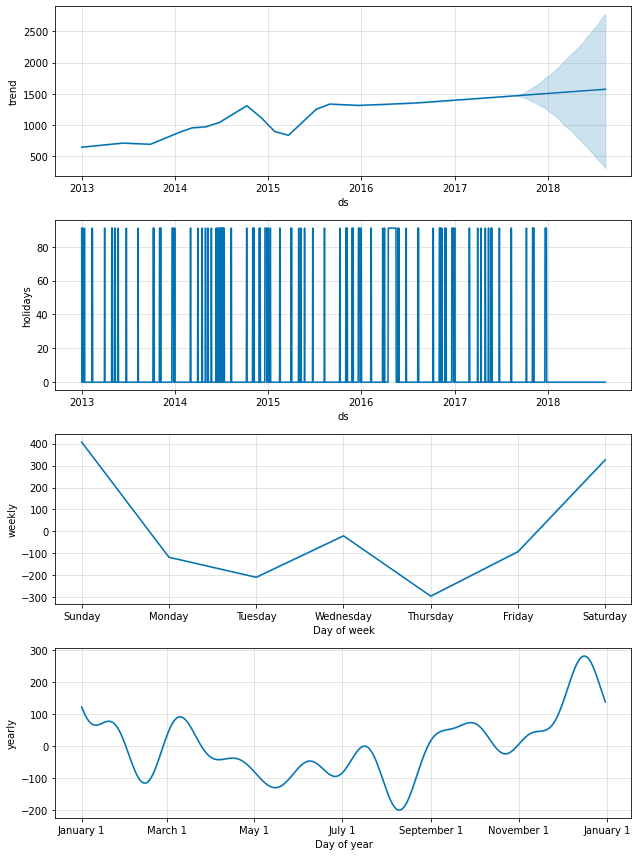

In [ ]:
# plot components
themodel.plot_components(forecast);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
 pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.4 MB/s 
     |████████████████████████████████| 9.8 MB 15.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance

In [ ]:
train_choice = train[train['store_nbr'] == 44].copy()
stores_choice = stores[stores['store_nbr'] == 44].copy()

In [ ]:
train_choice['date'] = pd.to_datetime(train_choice['date'])

In [ ]:
print("Rows: ", train_choice.shape)
print("Remove duplicates rows:", train_choice.drop_duplicates().shape)

Rows:  (55572, 6)
Remove duplicates rows: (55572, 6)


In [ ]:
train_choice = train_choice.groupby('date')[['sales','onpromotion']].sum().reset_index()

In [ ]:
dates = pd.date_range(start=min(train_choice['date']),end=max(train_choice['date']))
print('Total Days sales:', train_choice.shape[0])
print('Total Days Corret:', len(dates))

Total Days sales: 1684
Total Days Corret: 1688


In [ ]:
train_choice[train_choice['sales'] <= 0]

,date,sales,onpromotion
0,2013-01-01,0.0,0
364,2014-01-01,0.0,0
728,2015-01-01,0.0,0
1092,2016-01-01,0.0,0
1457,2017-01-01,0.0,0


In [ ]:
dates = pd.DataFrame(dates, columns=['date'])
train_choice = dates.merge(train_choice,on='date',how='left')

In [ ]:
train_choice.fillna(0,inplace=True)

In [ ]:
holidays_events[holidays_events['date'] == '2012-10-09']

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True


In [ ]:
holidays_events[holidays_events['date'] == '2012-10-12']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False


In [ ]:
index_events_trasnferred = holidays_events[holidays_events['transferred']].index

In [ ]:
holidays_events.drop(index_events_trasnferred, axis=0, inplace=True)

In [ ]:
stores_choice

,store_nbr,city,state,type,cluster
43,44,Quito,Pichincha,A,5


In [ ]:
holidays_events = holidays_events[(holidays_events['locale_name'] == 'Quito') | (holidays_events['locale'] == 'National')]

In [ ]:
oil['date'] = pd.to_datetime(oil['date'] )

In [ ]:
oil.isna().mean()

date          0.000000
dcoilwtico    0.035304
dtype: float64

In [ ]:
oil.fillna(oil.shift(1),inplace=True)

In [ ]:
oil[oil['dcoilwtico'].isna()]

,date,dcoilwtico
0,2013-01-01,NaN
1175,2017-07-04,NaN


In [ ]:
train_choice['holiday'] = np.where(train_choice['date'].isin(holidays_events['date']),1,0)
train_choice = train_choice.merge(oil, on='date',how='left')

In [ ]:
train_choice['dcoilwtico'] = train_choice['dcoilwtico'].fillna(train_choice['dcoilwtico'].shift(1))
train_choice['dcoilwtico'] = train_choice['dcoilwtico'].fillna(train_choice['dcoilwtico'].shift(1))

In [ ]:
train_size = 0.95
X_train =train_choice.loc[0:np.round(train_choice.shape[0]*train_size),:]
X_test = train_choice.loc[np.round(train_choice.shape[0]*train_size):,:]
X_train = X_train.set_index('date').asfreq('d')
X_test = X_test.set_index('date').asfreq('d')

In [ ]:
def plot_ts_decompose(decompose,figsize=(12,8)):
    fig, ax = plt.subplots(4,1,figsize=figsize)
    sns.lineplot(data = decompose.observed, x = decompose.observed.index, y = decompose.observed,ax=ax[0])
    sns.lineplot(data = decompose.trend, x = decompose.trend.index, y = decompose.trend,ax=ax[1])
    sns.lineplot(data = decompose.seasonal ,x = decompose.seasonal.index, y = decompose.seasonal,ax=ax[2])
    sns.lineplot(data = decompose.resid ,x = decompose.resid.index, y = decompose.resid,ax=ax[3])
    plt.tight_layout()

In [ ]:
decompose = seasonal_decompose(X_train['sales'],model='additive')

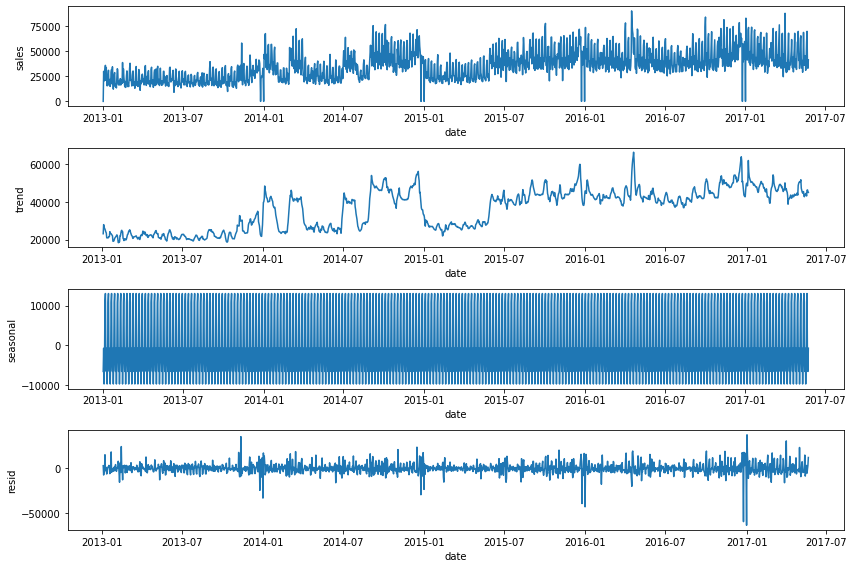

In [ ]:
plot_ts_decompose(decompose)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


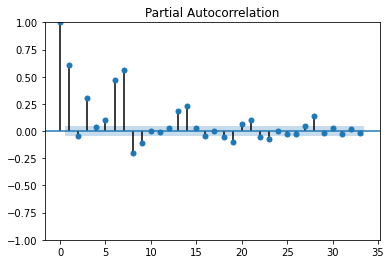

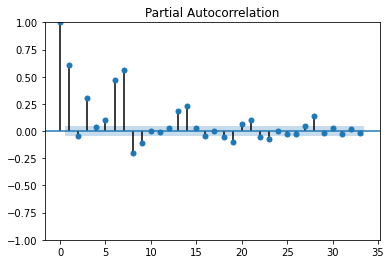

In [ ]:
plot_pacf(X_train['sales'], alpha = 0.05)

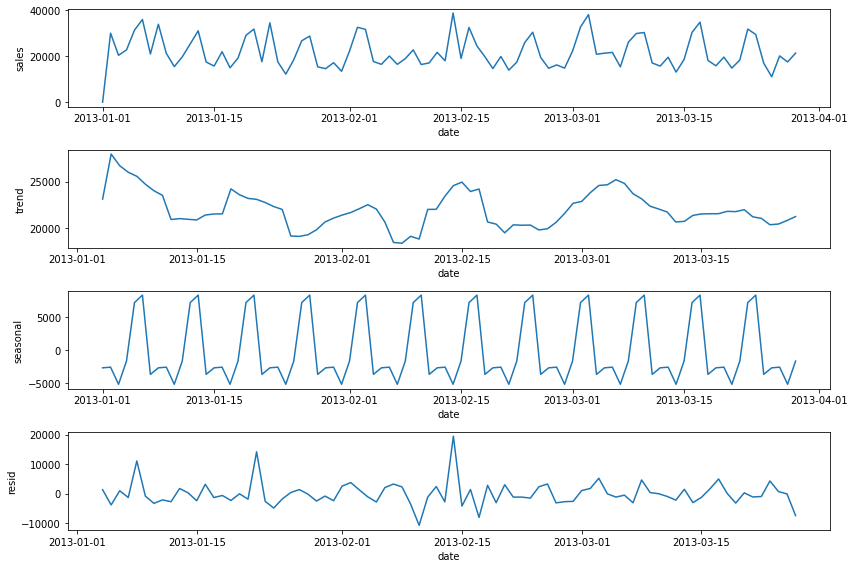

In [ ]:
decompose = seasonal_decompose(X_train[X_train.index < '2013-03-30']['sales'],model='additive')
plot_ts_decompose(decompose)

In [ ]:
p_value_adfuller = adfuller(X_train['sales'])[1]
print(p_value_adfuller)

0.04426919475856739


In [ ]:
X_train['diff_sales'] = X_train['sales'].diff()

1.2499298901067917e-18


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


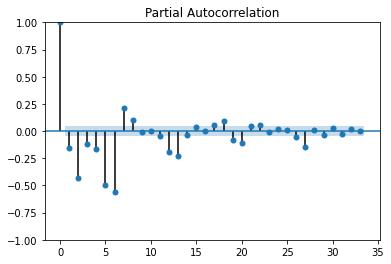

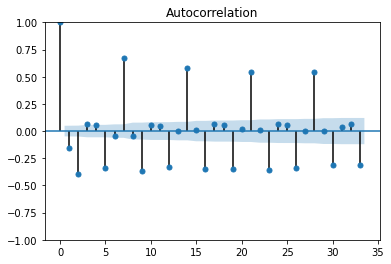

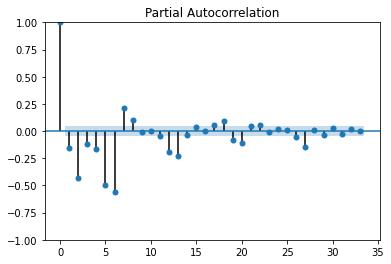

In [ ]:
# partialand full autocorrelation
p_value_adfuller = adfuller(X_train['diff_sales'].dropna())[1]
print(p_value_adfuller)
plot_acf(X_train['diff_sales'].dropna(), alpha = 0.05);
plot_pacf(X_train['diff_sales'].dropna(), alpha = 0.05)

In [ ]:

X_train['diff_onpromotion'] =  X_train['onpromotion'].diff()
X_train['diff_dcoilwtico'] =  X_train['dcoilwtico'].diff()

In [ ]:
X_train.groupby('holiday')[['diff_sales','sales']].describe()

diff_sales                                                       \
             count         mean           std          min          25%   
holiday                                                                   
0           1459.0  -184.752518  12363.818976 -51241.68402 -7159.458998   
1            145.0  2145.728920  19123.776392 -53827.75200 -8774.018030   

                                                sales                \
                50%          75%          max   count          mean   
holiday                                                               
0        1776.59402   8067.42850  56659.22203  1459.0  35836.559879   
1        4614.76800  13228.15501  83303.56000   146.0  41423.774010   

                                                                                
                  std  min           25%        50%           75%          max  
holiday                                                                         
0        14357.941754  0.0  23709.861998  34500.710  43295.736550  88183.51200  
1        18034.835528  0.0  31349.463675  41344.352  53734.424477  90557.92509

In [ ]:
X_test['diff_onpromotion'] =  X_test['onpromotion'].diff()
X_test['diff_sales'] =  X_test['sales'].diff()

In [ ]:
# arima model
train_arima= X_train.dropna().copy()
model_arima = ARIMA(train_arima['diff_sales'],freq='D', exog=train_arima[['diff_onpromotion','holiday']], order=(6,0,2))
result = model_arima.fit(method_kwargs={"warn_convergence": False})

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             diff_sales   No. Observations:                 1603
Model:                 ARIMA(6, 0, 2)   Log Likelihood              -16674.723
Date:                Mon, 13 Jun 2022   AIC                          33373.445
Time:                        09:35:37   BIC                          33438.001
Sample:                    01-03-2013   HQIC                         33397.415
                         - 05-24-2017                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -192.5319    105.887     -1.818      0.069    -400.066      15.002
diff_onpromotion    24.2551      1.727     14.048      0.000      20.871      27.639
holiday           2134.3064 

1.3470162070145575e-12


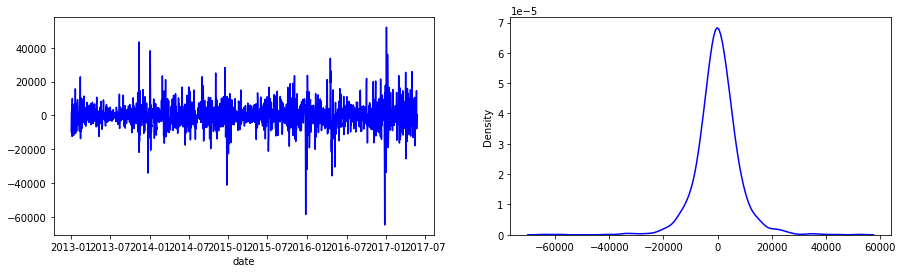

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.lineplot(x=result.resid.index, y=result.resid.values,ax=ax[0], color='blue')
sns.kdeplot(x=result.resid.values,ax=ax[1], color='blue')
print(adfuller(result.resid)[1])

In [ ]:
arima_test =  X_test.dropna()

In [ ]:
# predict the arima model
predict_arima = result.predict(start = min(arima_test.index), end = max(arima_test.index), exog = arima_test[['diff_onpromotion','holiday']])

7662.508911150805


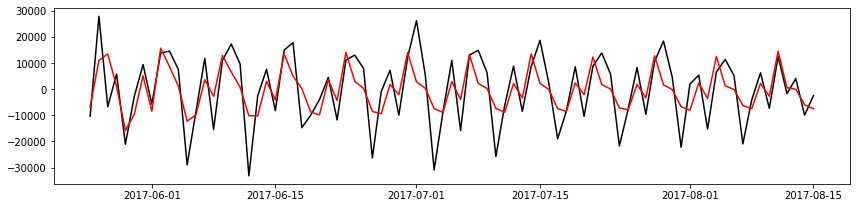

In [ ]:
# plot the ARIMA model
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(arima_test.index, arima_test['diff_sales'], color='black')
ax.plot(arima_test.index, predict_arima, color='red')
plt.tight_layout()
print(mean_absolute_error(arima_test['diff_sales'], predict_arima))

In [ ]:
# auto arima model
AAModel = auto_arima(train_arima['diff_sales'],freq='D', exog=train_arima[['diff_onpromotion','holiday']])

In [ ]:
print(AAModel.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1181
Model:               SARIMAX(5, 0, 2)   Log Likelihood              -12201.091
Date:                Mon, 13 Jun 2022   AIC                          24418.182
Time:                        08:49:00   BIC                          24458.775
Sample:                             0   HQIC                         24433.486
                               - 1181                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2156      0.029      7.544      0.000       0.160       0.272
ar.L2         -0.7910      0.021    -37.500      0.000      -0.832      -0.750
ar.L3         -0.2022      0.027     -7.375      0.0

In [ ]:
#  Predict Auto Arima model
predict_autoarima = AAModel.predict(n_periods = len(arima_test) , index = arima_test.index)

MAE: 12457.079


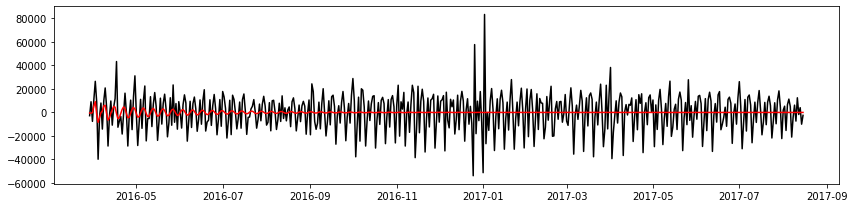

In [ ]:
# plot the Auto Arima model
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(arima_test.index, arima_test['diff_sales'], color='black')
ax.plot(arima_test.index, predict_autoarima, color='red')
plt.tight_layout()
print("MAE: %.3f"
        % mean_absolute_error(arima_test['diff_sales'], predict_autoarima))